In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [85]:
!kaggle datasets download -d username/dogvscat

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogvscat.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogvscat/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    verbose=True,
)



Found 500 files belonging to 2 classes.


In [6]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogvscat/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    verbose=True,
)

Found 50 files belonging to 2 classes.


In [7]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
def process_normalize(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process_normalize)
validation_ds=validation_ds.map(process_normalize)

In [9]:
#cnn model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 790ms/step - accuracy: 0.4858 - loss: 0.9613 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.5107 - loss: 0.6948 - val_accuracy: 0.5200 - val_loss: 0.6906
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.6043 - loss: 0.6859 - val_accuracy: 0.5000 - val_loss: 0.7307
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.6046 - loss: 0.6591 - val_accuracy: 0.5600 - val_loss: 0.6802
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.7039 - loss: 0.5669 - val_accuracy: 0.6000 - val_loss: 0.7011
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 475ms/step - accuracy: 0.7994 - loss: 0.4050 - val_accuracy: 0.5800 - val_loss: 0.7471
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 403ms/step - accuracy: 0.8945 - loss: 0.2756 - val_accuracy: 0.6000 - val_loss: 0.8979
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step - accuracy: 0.9637 - loss: 0.1323 - val_accuracy: 

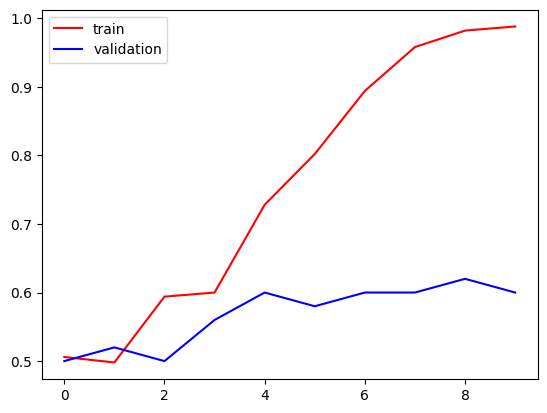

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

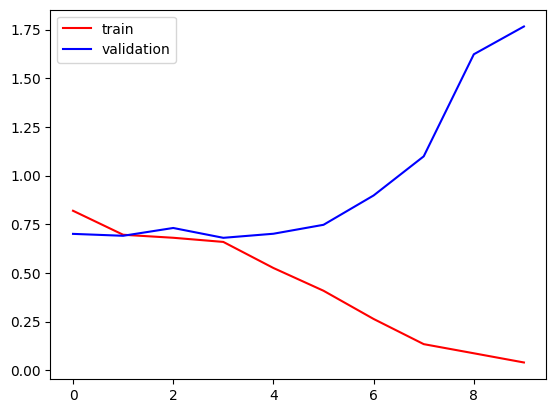

In [15]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()

In [16]:
#reduce overfitting

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [19]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 756ms/step - accuracy: 0.4836 - loss: 7.6859 - val_accuracy: 0.6000 - val_loss: 1.6219
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 484ms/step - accuracy: 0.6317 - loss: 6.0736 - val_accuracy: 0.6800 - val_loss: 1.2904
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step - accuracy: 0.6478 - loss: 6.1877 - val_accuracy: 0.5400 - val_loss: 6.0025
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.7286 - loss: 3.0225 - val_accuracy: 0.5200 - val_loss: 5.9457
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.7155 - loss: 3.1580 - val_accuracy: 0.5200 - val_loss: 4.8623
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.7880 - loss: 2.4774 - val_accuracy: 0.4600 - val_loss: 3.8676
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step - accuracy: 0.8316 - loss: 1.4659 - val_accuracy: 0.6000 - val_loss: 6.7583
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.8099 - loss: 1.7799 - val_accurac

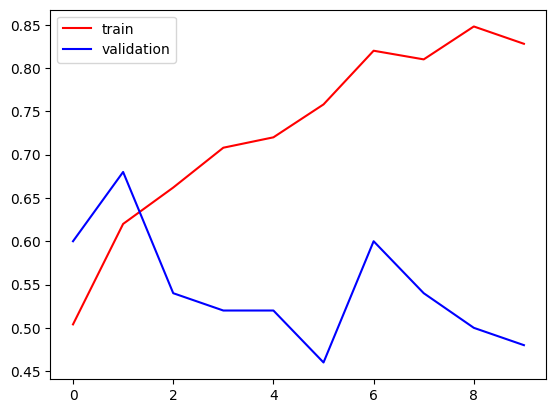

In [20]:
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

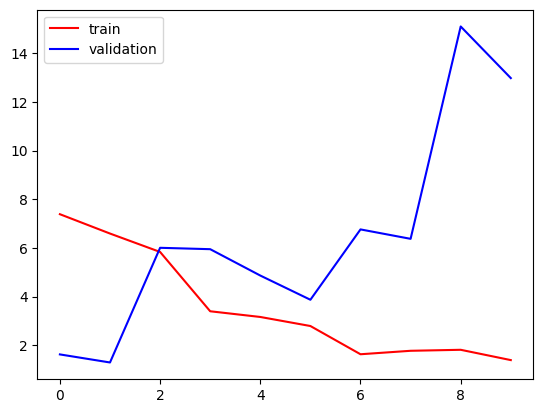

In [21]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()

In [22]:
import cv2

In [71]:
test_img=cv2.imread("/content/Screenshot google cat.png")

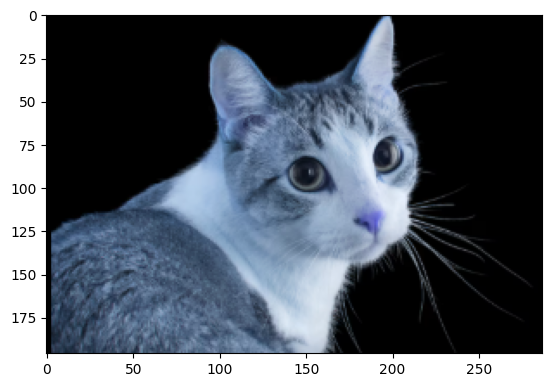

In [72]:
plt.imshow(test_img)

In [73]:
test_img.shape

(196, 287, 3)

In [74]:
test_img=cv2.resize(test_img,(256,256))

In [75]:
test_input=test_img.reshape((1,256,256,3))

In [76]:
test_input.shape

(1, 256, 256, 3)

In [77]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [78]:
test_img=cv2.imread("/content/Screenshot google dog.png")

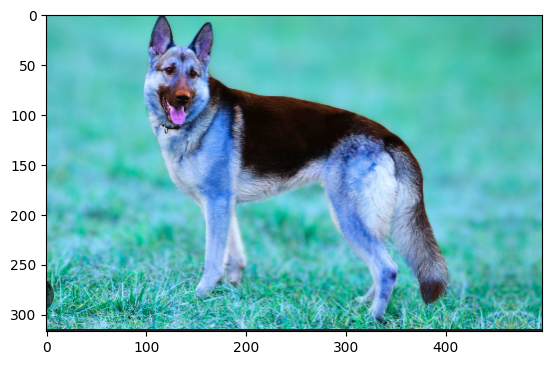

In [79]:
plt.imshow(test_img)

In [80]:
test_img.shape

(317, 497, 3)

In [81]:
test_img=cv2.resize(test_img,(256,256))

In [82]:
test_input=test_img.reshape((1,256,256,3))

In [83]:
test_input.shape

(1, 256, 256, 3)

In [84]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

# Apply data Augmentation

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
batch_size=16
#augmentation config  for training data
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#augmentation config  for testing data
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    directory="/content/dogvscat/train",
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="binary"
)
test_generator=test_datagen.flow_from_directory(
    directory="/content/dogvscat/test",
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="binary"
)

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [101]:

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [102]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])


In [103]:
history=model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 601ms/step - accuracy: 0.5079 - loss: 2.6563 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 495ms/step - accuracy: 0.5132 - loss: 0.7048 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 487ms/step - accuracy: 0.5467 - loss: 0.7141 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 486ms/step - accuracy: 0.4758 - loss: 0.7690 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 506ms/step - accuracy: 0.5097 - loss: 0.6966 - val_accuracy: 0.6000 - val_loss: 0.6853
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step - accuracy: 0.5338 - loss: 0.6889 - val_accuracy: 0.5200 - val_loss: 0.6851
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 491ms/step - accuracy: 0.5162 - loss: 0.6950 - val_accuracy: 0.5800 - val_loss: 0.6880
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 518ms/step - accuracy: 0.5574 - loss: 0.6898 - val_accu

In [104]:
import cv2

In [119]:
test_img=cv2.imread("/content/Screenshot google cat,.png")

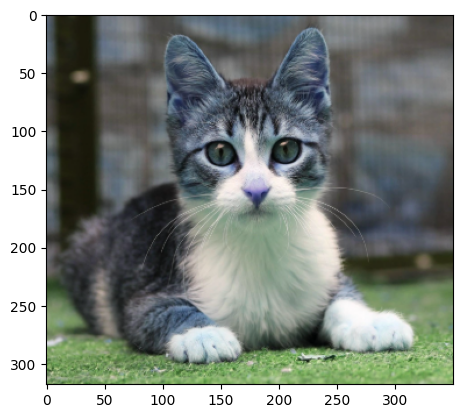

In [120]:
plt.imshow(test_img)

In [121]:
test_img.shape

(318, 350, 3)

In [122]:
test_img=cv2.resize(test_img,(256,256))

In [123]:
test_input=test_img.reshape((1,256,256,3))

In [124]:
test_input.shape

(1, 256, 256, 3)

In [125]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.8788764e-05]], dtype=float32)

In [112]:
test_img=cv2.imread("/content/Screenshot google dog.png")

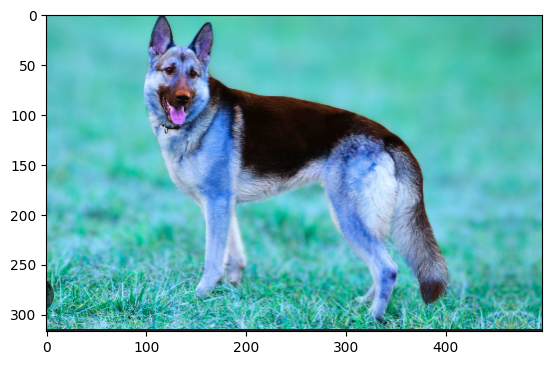

In [113]:
plt.imshow(test_img)

In [114]:
test_img.shape

(317, 497, 3)

In [115]:
test_img=cv2.resize(test_img,(256,256))

In [116]:
test_input=test_img.reshape((1,256,256,3))

In [117]:
test_input.shape

(1, 256, 256, 3)

In [118]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)